In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [106]:
parser = lambda date: pd.datetime.strptime(date, '%Y-%m')
data = pd.read_csv('zuerich-monthly-sunspot-numbers-.csv',converters={'Month': parser})

In [107]:
data = data.rename(columns={'Zuerich monthly sunspot numbers 1749-1983': 'val'})
data

,Month,val
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
5,1749-06-01,83.5
6,1749-07-01,94.8
7,1749-08-01,66.3
8,1749-09-01,75.9
9,1749-10-01,75.5


In [148]:
y_col = 'val'
y = data[y_col].values
y.shape

(2820,)

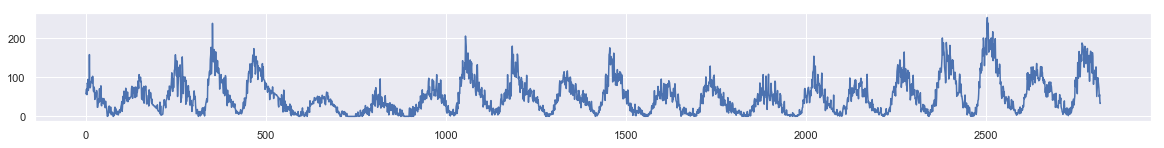

In [149]:
y_s = np.copy(y)
fig = plt.figure(figsize=(20,2))
pl = fig.add_subplot(111)
pl.plot(y_s)

In [190]:

class AnomalyDetection():
    """
    This model will calculate the expected curve and standard deviation for a certain time interval
    If the input value will lie outside a certain threshold of the standard deviation at that point, 
    it will detect and outlier
    """
    
    def __init__(self,detection_threshold=1.2,period_interval=12,period_ticks=None):
        """
        param: detection_threshold - the multiplier of the standard deviation that we want to allow
        param: period_interval - the time interval that we want to average over. 
        e.g if you have a data value each month and you want to have your model represent the "average year"
        you put a period interval of 12
        """
        self.detection_threshold = detection_threshold
        self.period_interval = period_interval
        if period_ticks is not None:
            assert len(period_ticks) == period_interval
        self.period_ticks = period_ticks
    
    def fit(self, data):
        """
        param: data - the time series data to fit your model with. Length should be divisible by the period interval
        """
        assert data.shape[0] % self.period_interval == 0
        y_period = data.reshape((self.period_interval,y.shape[0]//self.period_interval))
        self.y_mean = y_period.mean(axis=1)
        self.y_std = y_period.std(axis=1)
    
    def predict(self,value,time_idx):
        """
        predict wether a given value at a certain time is considered abnormal
        param: value - the value you want to predict
        param: time_idx - the timestamp index at which this value occured. 
        E.g. a value that occured in May, that index would be 4 (starting index is 0)
        """
        idx = time_idx%self.period_interval
        mean = self.y_mean[idx]
        std = self.y_std[idx]
        return np.abs(value - mean) > std * self.detection_threshold
    
    def plot(self):
        """
        Plot the "expected" time period and deviation that your model allows
        """
        x = np.arange(self.y_mean.shape[0])
        plt.plot(x,self.y_mean)
        plt.xticks(x,self.period_ticks)
        plt.errorbar(x, self.y_mean, self.y_std * self.detection_threshold, linestyle='None', marker='^')

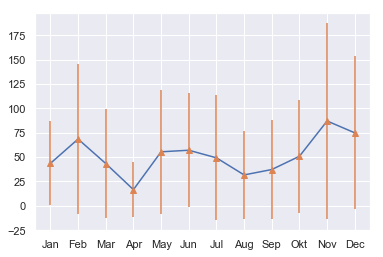

In [191]:
model = AnomalyDetection(
    detection_threshold=1.6,
    period_interval=12,
    period_ticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec'])
model.fit(y)
model.predict(20,1)
model.plot()